# FYS-STK4155 Excercises week 35


## Exercise 1 
**a)** 

The shape of $\boldsymbol{a}^T \boldsymbol{x} $ is 1

The shape of $\boldsymbol{x}$ is $n\times 1$ since it is a column vector. 

The shape of $\frac{ \partial ( \boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}}$ is $1 \times n$. 

**b)**
Since $\boldsymbol{a}^T\boldsymbol{x} = a_0x_0+a_1x_1 + \dots + a_{n-1}x_{n-1}$ and $\frac{\partial}{\partial x_i} \left( a_0x_0+a_1x_1 + \dots +a_ix_i + \dots + a_{n-1}x_{n-1} \right) = a_i $
$$\frac{ \partial ( \boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \left[ \frac{ \partial ( \boldsymbol{a}^T\boldsymbol{x})}{\partial x_0}, \frac{ \partial ( \boldsymbol{a}^T\boldsymbol{x})}{\partial x_1}, \dots, \frac{ \partial ( \boldsymbol{a}^T\boldsymbol{x})}{\partial x_{n-1}}   \right] =  \left[ a_0, a_1, \dots, a_{n-1} \right] = \boldsymbol{a}^T$$


**c)**
$\boldsymbol{a} = \left[a_0, a_1, \dots, a_{n-1} \right]$ and $\alpha_{ij}$ describes the elements of $A$. 

$\boldsymbol{a}^TA\boldsymbol{a}$ is a scalar: $\boldsymbol{a}^TA\boldsymbol{a} = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1} a_i\alpha_{ij}a_j$
$$ \frac{\partial \boldsymbol{a}^TA\boldsymbol{a}}{\partial a_k} = \sum_{i=0}^{n-1} \alpha_{ik} a_i + \sum_{j=0}^{n-1} \alpha_{kj}a_j$$

which gives

$$ \frac{\partial \boldsymbol{a}^TA\boldsymbol{a}}{\partial \boldsymbol{a}} = \boldsymbol{a}^T\left(A + A^T \right) $$






## Exercise 2
**a)** Setting the derivative with respect to $\theta$ equal to zero means we find either the greatest or lowest value of the mean squared error. This will be the lowest value becuase of the nature of the mean squared error function we use. 

**b)** Since $X$ is invertible 
$$ X \theta = y $$
$$ X^{-1}X \theta = X^{-1} y $$
$$ \theta = X^{-1} y$$
The mean square error will be zero and cannot be lower.

**c)** Using rules for derivatives:
$$ \frac{\partial \left(\boldsymbol{x}-A\boldsymbol{s} \right)^T \left(\boldsymbol{x}-A\boldsymbol{s} \right)}{\partial \boldsymbol{s}} = 2\left(\boldsymbol{x} -A\boldsymbol{s} \right)^T \frac{\partial \left(\boldsymbol{x}-A\boldsymbol{s}\right)}{\partial\boldsymbol{s}} = 2\left(\boldsymbol{x} -A\boldsymbol{s} \right)^T \left(-A\right) = - 2\left(\boldsymbol{x} -A\boldsymbol{s} \right)^T A $$

**d)**
From the result above we get 
$$ \frac{\partial \left(\boldsymbol{y}-X\boldsymbol{\theta}\right)^T \left( \boldsymbol{y}-X\boldsymbol{\theta}\right)}{\partial \boldsymbol{\theta}} =- 2 \left(\boldsymbol{y}-A\boldsymbol{\theta}\right)^T X $$

Setting the right side equal to zero:
$$ - 2 \left(\boldsymbol{y}-A\boldsymbol{\theta}\right)^TX = 0$$
$$ -2 \left(\boldsymbol{y}-\boldsymbol{\theta}^T X^T\right) X = 0$$
$$ -2\boldsymbol{y}^TX + 2 \boldsymbol{\theta}X^TX = 0 $$
$$ \boldsymbol{\theta}^T X^TX = \boldsymbol{y}^TX $$
$$ \boldsymbol{\theta}^T = \boldsymbol{y}^TX \left(X^TX \right)^{-1} $$
$$ \boldsymbol{\hat{\theta}} = \left(\boldsymbol{y}^T X \left(X^TX \right)^{-1}\right)^T$$
$$ \boldsymbol{\hat{\theta}} = \left(X^TX\right)^{-1}X^T\boldsymbol{y}$$

## Exercise 3

**a)**

In [7]:
import numpy as np

In [8]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])

In [9]:
X = np.zeros((n, 3))
X[:, 0] = 1.0
X[:, 1] = income
X[:, 2] = children

**b)**

$$ \boldsymbol{\hat{\theta}} = \left(X^TX\right)^{-1}X^T\boldsymbol{y}$$


In [11]:
def OLS_parameters(X, y):
    return (np.linalg.inv(X.T @ X) @ X.T ) @ y

# beta = OLS_parameters(X, y)


## Exercise 4
**a)**

In [13]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

In [14]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = 1.0
    for i in range(1,p+1):
        X[:, i] = x**i
    return X

X = polynomial_features(x, 5)

**b)**

In [16]:

beta = OLS_parameters(X, y)

**c)** split into test and train data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**d)** train model

In [20]:
# def MSE(y_data,y_model):
    # return np.sum((y_data-y_model)**2)/n

In [21]:
beta = OLS_parameters(X_train, y_train)
y_tilde = X_train @ beta

print("Training MSE")
print(mean_squared_error(y_train,y_tilde))

ypredict = X_test @ beta
print("Test MSE")
print(mean_squared_error(y_test,ypredict))


Training MSE
0.01278494261654763
Test MSE
0.017620095101497778


**e)** Repeat for polynomials of degree 2 to 10. Plot.

In [23]:
import matplotlib.pyplot as plt

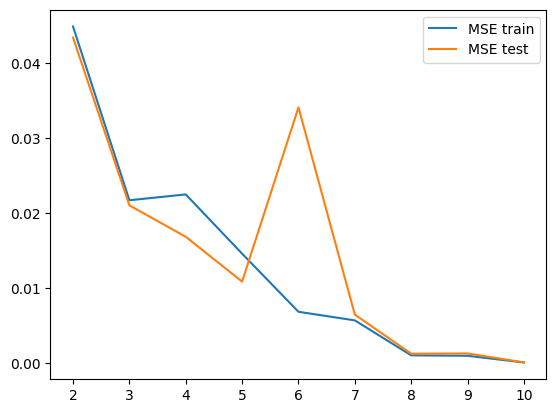

In [24]:
n = 9
mse_train = np.zeros(n)
mse_test = np.zeros(n)

for i in range(n):
    X = polynomial_features(x, i+2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    beta = OLS_parameters(X_train, y_train)
    y_tilde = X_train @ beta
    mse_train[i] =  mean_squared_error(y_train, y_tilde)
    ypredict = X_test @ beta
    mse_test[i] = mean_squared_error(y_test, ypredict)


plt.plot(range(2,n+2), mse_train, label='MSE train')
plt.plot(range(2,n+2), mse_test, label='MSE test')
plt.legend(loc='best')


**f)** The lines change when I rerun the code. But this looks like we need a higher order polynomial to reduce the mean squared error. 

## Exercise 5
**a)** make sure `polynomial_features` matches `scikitlearn`. 

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X_sci = X.copy()
poly.fit_transform(X_sci)

array([[ 1.00000000e+00,  1.00000000e+00, -3.00000000e+00, ...,
         7.97664431e+22, -2.39299329e+23,  7.17897988e+23],
       [ 1.00000000e+00,  1.00000000e+00, -2.93939394e+00, ...,
         2.99484349e+22, -8.80302479e+22,  2.58755577e+23],
       [ 1.00000000e+00,  1.00000000e+00, -2.87878788e+00, ...,
         1.10170150e+22, -3.17156492e+22,  9.13026264e+22],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  2.87878788e+00, ...,
         1.10170150e+22,  3.17156492e+22,  9.13026264e+22],
       [ 1.00000000e+00,  1.00000000e+00,  2.93939394e+00, ...,
         2.99484349e+22,  8.80302479e+22,  2.58755577e+23],
       [ 1.00000000e+00,  1.00000000e+00,  3.00000000e+00, ...,
         7.97664431e+22,  2.39299329e+23,  7.17897988e+23]])

In [28]:
assert X_sci.all() == X.all()

**b)**

In [30]:
poly_model = LinearRegression(fit_intercept=False).fit(X, y)

assert poly_model.coef_.all() == beta.all()